<a href="https://colab.research.google.com/github/yahya212yahya/Energy-Efficiency-Optimazation/blob/main/Energy_Efficiency_Optimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

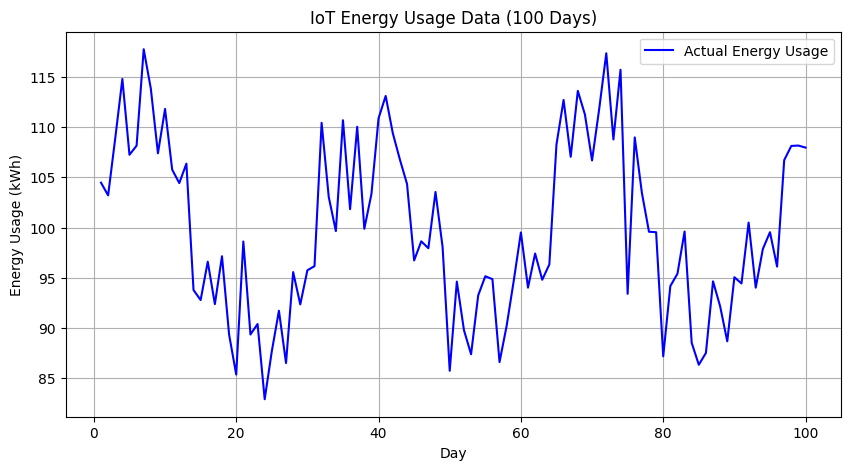

Mean Squared Error: 63.99


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


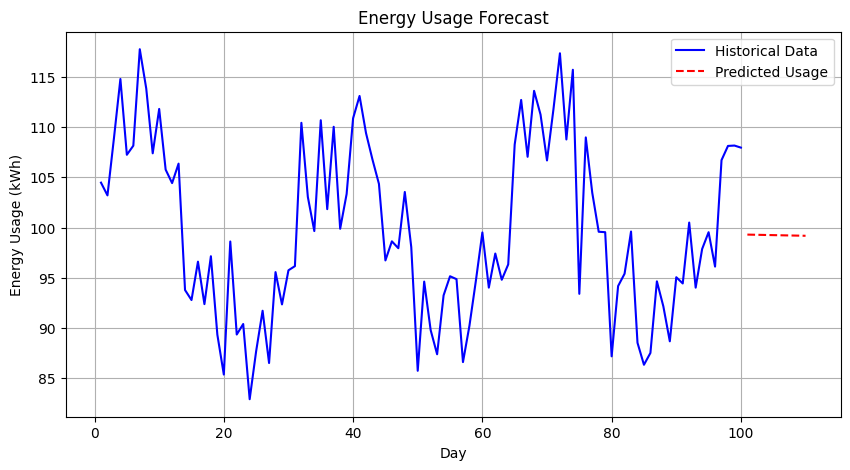

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Simulate IoT energy data
np.random.seed(42)
days = np.arange(1, 101)  # 100 days
energy_usage = 100 + 10 * np.sin(0.2 * days) + np.random.normal(0, 5, size=100)

# Create DataFrame
df = pd.DataFrame({
    'Day': days,
    'EnergyUsage_kWh': energy_usage
})

# Plot raw data
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['EnergyUsage_kWh'], label='Actual Energy Usage', color='blue')
plt.title('IoT Energy Usage Data (100 Days)')
plt.xlabel('Day')
plt.ylabel('Energy Usage (kWh)')
plt.grid(True)
plt.legend()
plt.show()

# Prepare data for prediction
X = df[['Day']]
y = df['EnergyUsage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train ML model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Predict future energy usage (next 10 days)
future_days = np.arange(101, 111).reshape(-1, 1)
future_predictions = model.predict(future_days)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(df['Day'], df['EnergyUsage_kWh'], label='Historical Data', color='blue')
plt.plot(future_days, future_predictions, label='Predicted Usage', color='red', linestyle='--')
plt.title('Energy Usage Forecast')
plt.xlabel('Day')
plt.ylabel('Energy Usage (kWh)')
plt.legend()
plt.grid(True)
plt.show()